<a href="https://colab.research.google.com/github/UPENDRAA09/Python-Language/blob/main/a_Dummy_Image_for_Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

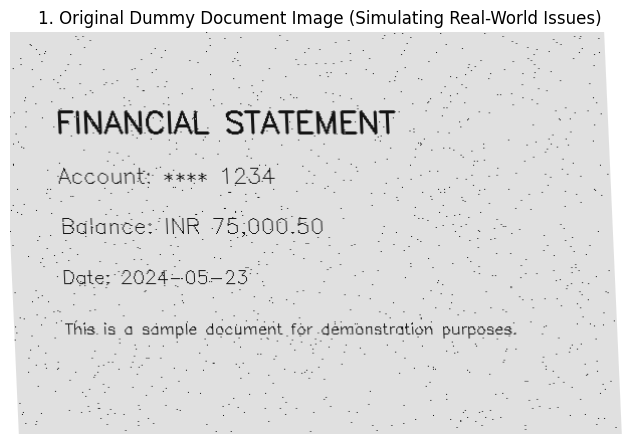

In [1]:
# Creating a Dummy Image for Demonstration
# To make the code runnable and illustrative, we'll create a synthetic image that simulates a typical document image with some common issues (skew, noise, low contrast).
# Python
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Helper function for visualization ---
def show_image(title, img, cmap=None, figsize=(8, 6)):
    """Displays an image using matplotlib."""
    plt.figure(figsize=figsize)
    if cmap is None and (len(img.shape) == 2 or img.shape[2] == 1): # Grayscale
        plt.imshow(img, cmap='gray')
    else: # Color (OpenCV reads BGR, matplotlib expects RGB)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 and img.shape[2] == 3 else img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- Function to create a dummy document image ---
def create_dummy_document_image(size=(400, 600), add_noise=True, add_skew=True, low_contrast=True):
    img = np.full((size[0], size[1], 3), 255, dtype=np.uint8) # White background

    # Add some text
    cv2.putText(img, "FINANCIAL STATEMENT", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    cv2.putText(img, "Account: **** 1234", (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1)
    cv2.putText(img, "Balance: INR 75,000.50", (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1)
    cv2.putText(img, "Date: 2024-05-23", (50, 250), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)
    cv2.putText(img, "This is a sample document for demonstration purposes.", (50, 300), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    if add_noise:
        # Simulate salt-and-pepper noise
        num_salt = int(0.005 * size[0] * size[1])
        coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape[:2]]
        img[coords[0], coords[1]] = 255
        num_pepper = int(0.005 * size[0] * size[1])
        coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape[:2]]
        img[coords[0], coords[1]] = 0

    if low_contrast:
        # Simulate low contrast
        img = cv2.convertScaleAbs(img, alpha=0.8, beta=20) # Reduces contrast and shifts brightness

    if add_skew:
        # Simulate skew (shear along x-axis)
        rows, cols = img.shape[:2]
        skew_angle_rad = np.deg2rad(np.random.uniform(-5, 5)) # Random small skew
        M_skew = np.float32([[1, np.tan(skew_angle_rad), 0], [0, 1, 0]])
        # Calculate new dimensions after skew to avoid cropping
        nW = int(cols + rows * np.abs(np.tan(skew_angle_rad)))
        nH = rows
        M_skew[0, 2] = -rows * np.abs(np.tan(skew_angle_rad)) / 2 # Adjust translation to keep content centered
        img = cv2.warpAffine(img, M_skew, (nW, nH), borderValue=(255,255,255)) # Fill new borders with white

    return img

# Generate a dummy image for demonstration
dummy_image = create_dummy_document_image()
show_image("1. Original Dummy Document Image (Simulating Real-World Issues)", dummy_image)
